In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
#nltk.download('punkt')

In [3]:
data_1 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 35 CSV.csv", encoding='latin-1')
data_2 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 37 CSV.csv", encoding='latin-1')
data_3 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 38 CSV.csv", encoding='latin-1')
data_4 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 39 CSV.csv", encoding='latin-1')
data = data_1.append(data_2, ignore_index=True)
data = data.append(data_3, ignore_index=True)
data = data.append(data_4, ignore_index=True)
data.head()

,date,name,currency,language,name2,name3,ageGroup,articleId,colors,colorGroup,...,ped,pid,sportsCategory,subBrand,technologies,type,url,price,territories,type5
0,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,011040,Black/Footwear White,schwarz,...,NaN,04/18/2013,Fußball,Performance,EVA,NaN,https://www.adidas.de/world-cup-fussballschuh/...,NaN,NaN,NaN
1,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,015110,Black/Footwear White/Black,schwarz,...,NaN,04/18/2013,Fußball,Performance,EVA,NaN,https://www.adidas.de/copa-mundial-fussballsch...,NaN,NaN,NaN
2,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019000,Black/Footwear White,schwarz,...,NaN,04/18/2013,Freizeit,Performance,EVA,NaN,https://www.adidas.de/samba-leather-schuh/0190...,NaN,NaN,NaN
3,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019099,Black/White,schwarz,...,NaN,01/28/2015,Freizeit,Sport inspired,EVA,NaN,https://www.adidas.de/samba-super-schuh/019099...,NaN,NaN,NaN
4,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019228,Black/Footwear White/Red,schwarz,...,NaN,04/18/2013,Fußball,Performance,TRAXION|EVA,NaN,https://www.adidas.de/mundial-team-fussballsch...,NaN,NaN,NaN


In [4]:
data.isnull().sum()

date                    0
name                    0
currency                0
language                0
name2                   0
name3                 368
ageGroup            10309
articleId             368
colors              10045
colorGroup          37566
consumerRating        368
currentPrice          368
description          5033
discountedSince    277723
division              368
gender              11363
group               76709
imageUrl              404
initialPrice          368
modelNumber           368
name4                 371
ped                416727
pid                   368
sportsCategory      88758
subBrand            93557
technologies       281645
type               274499
url                   368
price              439691
territories        439691
type5              439691
dtype: int64

In [5]:
data.language.unique()

array(['de-DE', 'en-US', 'en-GB'], dtype=object)

In [6]:
data.subBrand.unique()

array(['Performance', 'Sport inspired', 'adidas by Stella McCartney',
       'Essentials', nan, 'Porsche Design Sport by adidas',
       'Sport Inspired', 'sport inspired', 'Sport', 'performance',
       'adidas by stella mccartney', 'porsche design sport by adidas',
       'essentials', 'adidas neo', 'Sportswear', 'Jordan', 'Collections',
       'UAS', 'Hurley'], dtype=object)

In [7]:
# Filtering US and UK
#data = data.loc[data["language"].isin(['de-DE'])]

In [8]:
#data.group.unique()

In [9]:
data_req = data.loc[:,["name", "description", "division","sportsCategory", "subBrand", "group", "name2", "name3", "name4", "url"]]

In [10]:
data_req = data_req.drop_duplicates()

In [11]:
len(data_req)

158140

In [12]:
data_req_x = data_req.loc[:,["name", "description", "division", "group", "name2", "name3", "name4", "subBrand", "url"]]
data_req_y = data_req.loc[:, ["sportsCategory"]]

In [13]:
data_req_x = data_req_x.fillna("unknown")
data_req = pd.concat([data_req_x, data_req_y], axis=1)

In [14]:
len(data_req)

158140

In [15]:
data_req = data_req.dropna()

In [16]:
data_req = data_req.drop_duplicates()

In [17]:
data_req["description"]  = data_req["name"] +" " + data_req["description"] +" " + data_req["division"] +" " + data_req["group"] +" " + data_req["name2"]+" " + data_req["name3"]+" " + data_req["name4"]+" " + data_req["subBrand"]+" " + data_req["url"]

In [18]:
data_req = data_req.drop(["name", "division", "group", "name2", "name3", "name4", "subBrand","url"], axis = 1)

In [19]:
data_req.columns = ["description", "subBrand"]

In [20]:
data_req.subBrand.unique()

array(['Fußball', 'Freizeit', 'Schwimmen', 'Basketball', 'Training',
       'Outdoor', 'Rugby', 'Gewichtheben', 'Running', 'Handball', 'Golf',
       'Tennis', 'Skateboarden', 'Feldhockey', 'Volleyball', 'Radfahren',
       'Boxen', 'Hockey', 'Yoga', 'Soccer', 'Swim', 'Lifestyle',
       'Football', 'Baseball', 'Lacrosse', 'Skateboarding', 'Boxing',
       'Weightlifting', 'football', 'lifestyle', 'swimming', 'basketball',
       'training', 'outdoor', 'weightlifting', 'running', 'handball',
       'rugby', 'golf', 'tennis', 'field hockey', 'boxing', 'volleyball',
       'Cycling', 'skateboarding', 'yoga', 'track & field', 'Tanzen',
       'Leichtathletik', 'Fitness & Training', 'American Football',
       'Laufen', 'Wandern', 'Baseball & Softball', 'not applicable',
       'Eishockey', 'Spinning', 'Baseball / Softball', 'Training & Gym',
       'Track & Field', 'Snowboarding', 'Cheerleading', 'Walking',
       'Surf & Swimming', 'Athletics', 'Gym & Training', 'Dance',
       'Ice Hock

In [21]:
len(data_req)

126055

In [22]:
data_req = data_req.drop_duplicates()

In [23]:
data_req.subBrand = data_req.subBrand.str.lower()
data_req.description = data_req.description.str.lower()

In [24]:
data_req.subBrand.unique()

array(['fußball', 'freizeit', 'schwimmen', 'basketball', 'training',
       'outdoor', 'rugby', 'gewichtheben', 'running', 'handball', 'golf',
       'tennis', 'skateboarden', 'feldhockey', 'volleyball', 'radfahren',
       'boxen', 'hockey', 'yoga', 'soccer', 'swim', 'lifestyle',
       'football', 'baseball', 'lacrosse', 'skateboarding', 'boxing',
       'weightlifting', 'swimming', 'field hockey', 'cycling',
       'track & field', 'tanzen', 'leichtathletik', 'fitness & training',
       'american football', 'laufen', 'wandern', 'baseball & softball',
       'not applicable', 'eishockey', 'spinning', 'baseball / softball',
       'training & gym', 'snowboarding', 'cheerleading', 'walking',
       'surf & swimming', 'athletics', 'gym & training', 'dance',
       'ice hockey', 'fussball', 'driving', 'motorsport', 'bekleidung',
       'footwear', 'combat', 'studio', 'crossfit', 'retro running',
       'court', 'fitness', 'casual', 'mma', 'ufc', 'sideline',
       'yoga & studio', 'ski 

In [25]:
lens = data_req.description.str.len()
lens.mean(), lens.std(), lens.max()

(542.0140494228709, 267.274792012912, 3585)

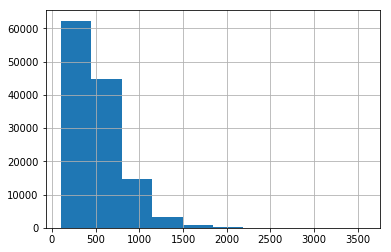

In [26]:
lens.hist();

In [27]:
data_req = data_req.dropna()

In [28]:
len(data_req)

126055

In [29]:
one_hot = pd.get_dummies(data_req.subBrand)

In [30]:
label_cols = data_req.subBrand.dropna().unique()

In [31]:
label_cols

array(['fußball', 'freizeit', 'schwimmen', 'basketball', 'training',
       'outdoor', 'rugby', 'gewichtheben', 'running', 'handball', 'golf',
       'tennis', 'skateboarden', 'feldhockey', 'volleyball', 'radfahren',
       'boxen', 'hockey', 'yoga', 'soccer', 'swim', 'lifestyle',
       'football', 'baseball', 'lacrosse', 'skateboarding', 'boxing',
       'weightlifting', 'swimming', 'field hockey', 'cycling',
       'track & field', 'tanzen', 'leichtathletik', 'fitness & training',
       'american football', 'laufen', 'wandern', 'baseball & softball',
       'not applicable', 'eishockey', 'spinning', 'baseball / softball',
       'training & gym', 'snowboarding', 'cheerleading', 'walking',
       'surf & swimming', 'athletics', 'gym & training', 'dance',
       'ice hockey', 'fussball', 'driving', 'motorsport', 'bekleidung',
       'footwear', 'combat', 'studio', 'crossfit', 'retro running',
       'court', 'fitness', 'casual', 'mma', 'ufc', 'sideline',
       'yoga & studio', 'ski 

In [32]:
minCount = 10
subBrand_minCount = pd.DataFrame((data_req.subBrand.value_counts() > minCount).reset_index())

In [33]:
subBrand_drop = subBrand_minCount.loc[subBrand_minCount["subBrand"] == False]

In [34]:
subBrand_drop

,index,subBrand
74,mma,False
75,gewichtheben,False
76,crossfit,False
77,spinning,False
78,squash und badminton,False
79,ringen,False
80,squash & badminton,False
81,footwear,False
82,ice hockey,False
83,eishockey,False


In [35]:
label_cols = np.setdiff1d(label_cols, subBrand_drop["index"])

In [36]:
data_req = pd.concat([data_req, one_hot], axis=1)

In [37]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [38]:
description = "description"

In [39]:
data_req = data_req.drop(subBrand_drop["index"], axis = 1)

In [40]:
np.random.seed(123)
data_req_sample = data_req.sample(frac=0.7)

In [41]:
train = data_req.loc[data_req.index.isin(data_req_sample.index)]
test = data_req.loc[~data_req.index.isin(data_req_sample.index)]

In [42]:
test_subBrand = test.subBrand

In [43]:
#test_subBrand

In [44]:
train = train.drop("subBrand", axis = 1)
test = test.drop("subBrand", axis = 1)

In [45]:
# token_dict = {}
# stemmer = PorterStemmer()

# def stem_tokens(tokens, stemmer):
#     stemmed = []
#     for item in tokens:
#         stemmed.append(stemmer.stem(item))
#     return stemmed

# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     stems = stem_tokens(tokens, stemmer)
#     return stems

In [46]:
# from stop_words import get_stop_words
# stop_words_english = get_stop_words('english')
# stop_words_german = get_stop_words('german')

In [47]:
#stop_words_english.append(stop_words_german)

In [48]:
# stop_words_english = sorted(set(map(tuple, stop_words_english)), reverse=True)

In [49]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words = None )
trn_term_doc = vec.fit_transform(train[description])
test_term_doc = vec.transform(test[description])

In [50]:
trn_term_doc, test_term_doc

(<88238x271004 sparse matrix of type '<class 'numpy.float64'>'
 	with 14093382 stored elements in Compressed Sparse Row format>,
 <37817x271004 sparse matrix of type '<class 'numpy.float64'>'
 	with 5996874 stored elements in Compressed Sparse Row format>)

In [51]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [52]:
x = trn_term_doc
test_x = test_term_doc

In [53]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit american football
fit athletics
fit baseball
fit baseball & softball
fit baseball / softball
fit basketball
fit bekleidung
fit boxen
fit boxing
fit casual
fit combat
fit court
fit cycling
fit dance
fit driving
fit feldhockey
fit field hockey
fit fitness
fit fitness & training
fit football
fit freizeit
fit fussball
fit fußball
fit golf
fit gym
fit gym & training
fit gymnastics
fit handball
fit hiking & trail
fit hockey
fit lacrosse
fit laufen
fit leichtathletik
fit lifestyle
fit motorsport
fit outdoor
fit padel
fit radfahren
fit retro running
fit rugby
fit run
fit running
fit schwimmen
fit sideline
fit skateboarden
fit skateboarding
fit ski & snowboard
fit snowboarding
fit soccer
fit softball
fit sportstyle
fit studio
fit surf
fit surf & swimming
fit surfen & schwimmen
fit surfing
fit swim
fit swimming
fit tanzen
fit tennis
fit to + from
fit track & field
fit track-and-field
fit trail running
fit training
fit training & gym
fit ufc
fit volleyball
fit walking
fit wandern
fit weightli

In [68]:
preds.shape

(37817, 74)

In [57]:
predictions = pd.DataFrame(preds, columns = label_cols)

In [58]:
test.index = np.arange(0, len(test))
test_subBrand.index = np.arange(0, len(test))

In [59]:
len(test)

37817

In [60]:
submid = pd.DataFrame({'description': test["description"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [61]:
submission.head()

,description,american football,athletics,baseball,baseball & softball,baseball / softball,basketball,bekleidung,boxen,boxing,...,training,training & gym,ufc,volleyball,walking,wandern,weightlifting,wrestling,yoga,yoga & studio
0,adidas dieser klassische fußballschuh überzeug...,0.000049,0.000030,0.000083,0.000033,0.000037,0.001741,0.000042,0.000059,0.000037,...,0.001697,0.000060,0.000028,0.000092,0.000144,0.000041,0.000030,0.000030,0.000288,0.000040
1,adidas hier wird einem legendären fußballschuh...,0.000038,0.000031,0.000079,0.000034,0.000042,0.001244,0.000030,0.000073,0.000038,...,0.001934,0.000061,0.000031,0.000104,0.000051,0.000031,0.000031,0.000031,0.000247,0.000049
2,adidas ein fußballschuh mit tf-sohle und klass...,0.000040,0.000031,0.000084,0.000032,0.000043,0.001714,0.000036,0.000064,0.000042,...,0.004290,0.000059,0.000031,0.000081,0.000054,0.000049,0.000034,0.000033,0.000321,0.000039
3,adidas ein fußballklassiker feiert sein reviva...,0.000038,0.000032,0.000079,0.000031,0.000037,0.001588,0.000037,0.000043,0.000036,...,0.000883,0.000062,0.000029,0.000101,0.000147,0.000034,0.000031,0.000032,0.000310,0.000040
4,adidas dieser basketball begleitet dich das ga...,0.000042,0.000037,0.000085,0.000039,0.000043,0.356800,0.000062,0.000057,0.000053,...,0.005008,0.000092,0.000037,0.000102,0.000056,0.000062,0.000040,0.000037,0.000270,0.000043


In [62]:
final_pred = pd.concat([submission, test_subBrand.str.lower()],axis = 1)

In [63]:
test_subBrand.str.lower().value_counts()

lifestyle               6982
training                6132
running                 3872
freizeit                2813
football                2232
golf                    1957
basketball              1793
fitness & training      1419
fußball                 1222
soccer                   902
laufen                   852
run                      760
yoga                     733
tennis                   722
to + from                482
baseball                 463
skateboarding            444
training & gym           434
surfing                  321
outdoor                  249
motorsport               218
gym & training           196
combat                   163
fussball                 162
fitness                  135
hockey                   119
surf                     110
rugby                    108
studio                    96
surf & swimming           95
                        ... 
court                     22
field hockey              21
trail running             21
padel         

In [64]:
final_pred["Predictions"] = final_pred[label_cols].idxmax(axis = 1)

In [65]:
from mlxtend.evaluate import confusion_matrix

y_target =    final_pred.subBrand
y_predicted = final_pred.Predictions

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted, 
                      binary=False)

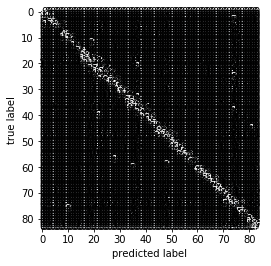

In [66]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [69]:
print(f'Accuracy Score : {accuracy_score(final_pred.subBrand, final_pred.Predictions)}')
print(f'F1 Score: {f1_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Precision: {precision_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Recall: {recall_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')

Accuracy Score : 0.9470872887854669


C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score: 0.7532938635854075
Precision: 0.7844135489622298
Recall: 0.7362466836147791


C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
#final_pred.to_csv("final_output_SubBrand_v4.csv", index_label=False, index=False)

In [83]:
len(final_pred)

20860

In [51]:
#test_subBrand

In [52]:
len(submission)

15062

In [54]:
#final_pred.isnull().sum()